In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funciones de optimización 2D
def rosenbrock_2d(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

def rastrigin_2d(x, y):
    return 20 + x**2 + y**2 - 10*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

# Gradientes 2D
def rosenbrock_gradient_2d(x, y):
    dx = -2*(1-x) + 200*(y-x**2)*(-2*x)
    dy = 200*(y-x**2)
    return np.array([dx, dy])

def rastrigin_gradient_2d(x, y):
    dx = 2*x + 20*np.pi*np.sin(2*np.pi*x)
    dy = 2*y + 20*np.pi*np.sin(2*np.pi*y)
    return np.array([dx, dy])

# Funciones de optimización 3D
def rosenbrock_3d(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2 + (1-x[1])**2 + 100*(x[2]-x[1]**2)**2

def rastrigin_3d(x):
    return 30 + np.sum(x**2) - 10*np.sum(np.cos(2*np.pi*x))

# Gradientes 3D
def rosenbrock_gradient_3d(x):
    dx = -2*(1-x[0]) + 200*(x[1]-x[0]**2)*(-2*x[0])
    dy = 200*(x[1]-x[0]**2) - 2*(1-x[1]) + 200*(x[2]-x[1]**2)*(-2*x[1])
    dz = 200*(x[2]-x[1]**2)
    return np.array([dx, dy, dz])

def rastrigin_gradient_3d(x):
    return 2*x + 20*np.pi*np.sin(2*np.pi*x)

In [27]:
def gradient_descent_adaptive_2d(f, grad_f, x0, y0, initial_lr=0.001, max_iter=1000, patience=50):
    x, y = x0, y0
    lr = initial_lr
    best_value = float('inf')
    plateau_count = 0
    path = [(x, y)]
    values = [f(x, y)]
    
    for _ in range(max_iter):
        if plateau_count >= patience:
            break
            
        grad = grad_f(x, y)
        new_x = x - lr * grad[0]
        new_y = y - lr * grad[1]
        new_value = f(new_x, new_y)
        
        if new_value < best_value:
            best_value = new_value
            plateau_count = 0
            lr *= 1.1
        else:
            lr *= 0.5
            plateau_count += 1
        
        x, y = new_x, new_y
        path.append((x, y))
        values.append(new_value)
    
    return np.array(path), np.array(values)

def gradient_descent_adaptive_3d(f, grad_f, x0, initial_lr=0.001, max_iter=1000, patience=50):
    x = x0.copy()
    lr = initial_lr
    best_value = float('inf')
    plateau_count = 0
    path = [x.copy()]
    values = [f(x)]
    
    for _ in range(max_iter):
        if plateau_count >= patience:
            break
            
        grad = grad_f(x)
        new_x = x - lr * grad
        new_value = f(new_x)
        
        if new_value < best_value:
            best_value = new_value
            plateau_count = 0
            lr *= 1.1
        else:
            lr *= 0.5
            plateau_count += 1
        
        x = new_x
        path.append(x.copy())
        values.append(new_value)
    
    # return np.array(path), np.array(values)

In [28]:
def plot_convergence_2d(path, values, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Trayectoria
    ax1.plot(path[:, 0], path[:, 1], 'r.-', alpha=0.5)
    ax1.plot(path[0, 0], path[0, 1], 'go', label='Inicio')
    ax1.plot(path[-1, 0], path[-1, 1], 'ro', label='Final')
    ax1.set_title(f'Trayectoria de Optimización - {title}')
    ax1.legend()
    ax1.grid(True)
    
    # Valores de la función
    ax2.plot(values, 'b-')
    ax2.set_title(f'Convergencia de Valores - {title}')
    ax2.set_yscale('log')
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

def plot_convergence_3d(path, values, title):
    fig = plt.figure(figsize=(15, 5))
    
    # Trayectoria 3D
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot3D(path[:, 0], path[:, 1], path[:, 2], 'r.-', alpha=0.5)
    ax1.scatter(path[0, 0], path[0, 1], path[0, 2], color='g', label='Inicio')
    ax1.scatter(path[-1, 0], path[-1, 1], path[-1, 2], color='r', label='Final')
    ax1.set_title(f'Trayectoria de Optimización 3D - {title}')
    ax1.legend()
    
    # Valores de la función
    ax2 = fig.add_subplot(122)
    ax2.plot(values, 'b-')
    ax2.set_title(f'Convergencia de Valores - {title}')
    ax2.set_yscale('log')
    ax2.grid(True)
    
    plt.tight_layout()
    return fig


Rosenbrock 2D:
Punto inicial: (-0.501840, 1.802857)
Punto final: (-0.797213, 0.705292)
Valor final: 3.716391

Rastrigin 2D:
Punto final: (-0.000000, 1.989912)
Valor final: 3.979831


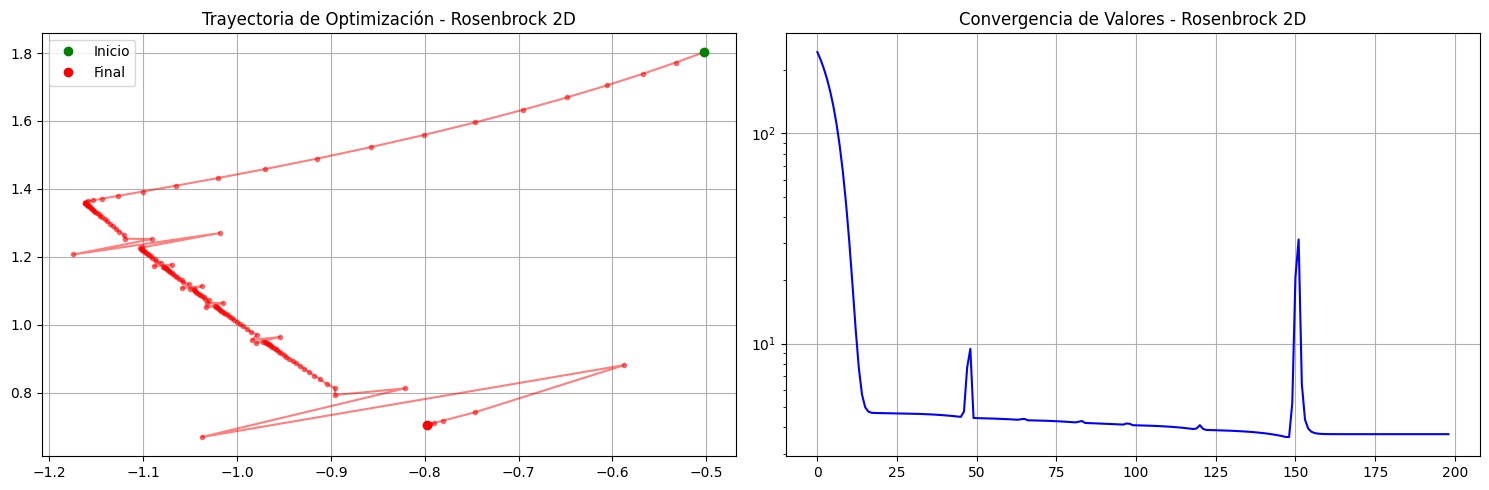

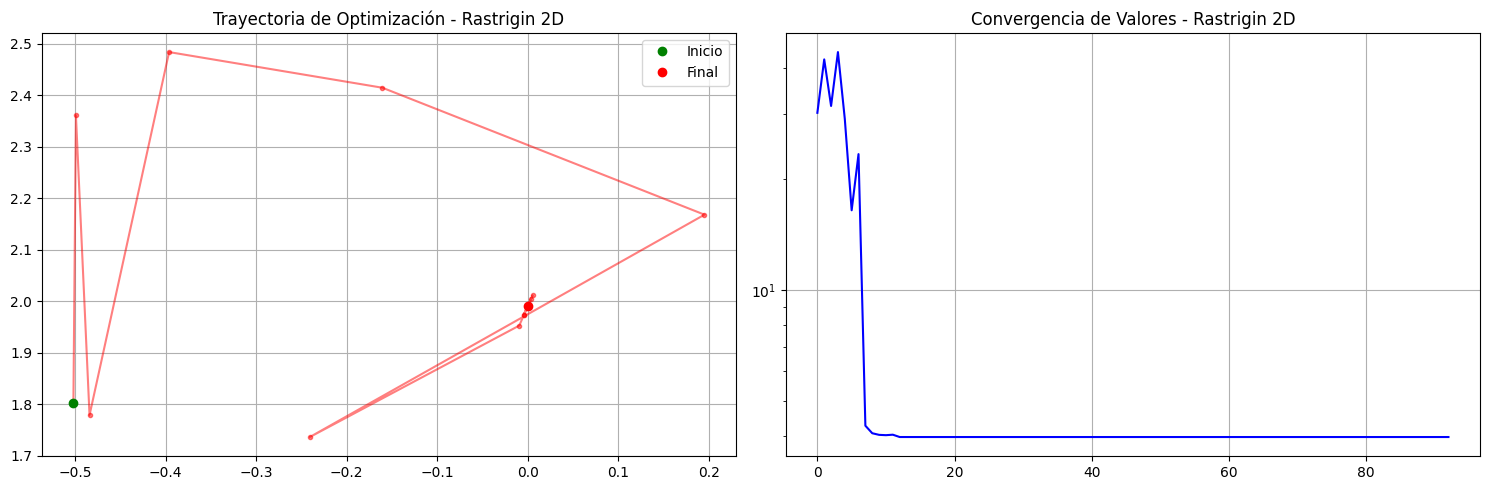

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(42)

# Ejemplo 2D - Rosenbrock
x0_2d, y0_2d = np.random.uniform(-2, 2, 2)
path_ros_2d, values_ros_2d = gradient_descent_adaptive_2d(
    rosenbrock_2d, rosenbrock_gradient_2d, x0_2d, y0_2d, initial_lr=0.0001
)

print("\nRosenbrock 2D:")
print(f"Punto inicial: ({x0_2d:.6f}, {y0_2d:.6f})")
print(f"Punto final: ({path_ros_2d[-1,0]:.6f}, {path_ros_2d[-1,1]:.6f})")
print(f"Valor final: {values_ros_2d[-1]:.6f}")

# Ejemplo 2D - Rastrigin
path_ras_2d, values_ras_2d = gradient_descent_adaptive_2d(
    rastrigin_2d, rastrigin_gradient_2d, x0_2d, y0_2d, initial_lr=0.01
)

print("\nRastrigin 2D:")
print(f"Punto final: ({path_ras_2d[-1,0]:.6f}, {path_ras_2d[-1,1]:.6f})")
print(f"Valor final: {values_ras_2d[-1]:.6f}")

# Visualizaciones
plot_convergence_2d(path_ros_2d, values_ros_2d, "Rosenbrock 2D")
plot_convergence_2d(path_ras_2d, values_ras_2d, "Rastrigin 2D")
plt.show()